# Exploring Ebay Car Sales





## Introduction
In this project we will work with a dataset that was originally scraped and uploaded to [Kaggle](https://www.kaggle.com/orgesleka/used-cars-database/data). It has been also modified by Dataquest:
- 50,000 data points were sampled from the full dataset
- The dataset was dirtied to make this project more interesting

## Column names and description
The data dictionary provided with data is as follows:

- __dateCrawled__ - When this ad was first crawled. All field-values are taken from this date.
- __name__ - Name of the car.
- __seller__ - Whether the seller is private or a dealer.
- __offerType__ - The type of listing
- __price__ - The price on the ad to sell the car.
- __abtest__ - Whether the listing is included in an A/B test.
- __vehicleType__ - The vehicle Type.
- __yearOfRegistration__ - The year in which the car was first registered.
- __gearbox__ - The transmission type.
- __powerPS__ - The power of the car in PS.
- __model__ - The car model name.
- __kilometer__ - How many kilometers the car has driven.
- __monthOfRegistration__ - The month in which the car was first registered.
- __fuelType__ - What type of fuel the car uses.
- __brand__ - The brand of the car.
- __notRepairedDamage__ - If the car has a damage which is not yet repaired.
- __dateCreated__ - The date on which the eBay listing was created.
- __nrOfPictures__ - The number of pictures in the ad.
- __postalCode__ - The postal code for the location of the vehicle.
- __lastSeenOnline__ - When the crawler saw this ad last online.





In [1]:
import numpy as np
import pandas as pd
autos=pd.read_csv(r'Data/autos.csv', encoding="Latin-1")
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [2]:
from dataset_info import Dataset_inspection,Outlier_analysis

In [3]:
Dataset_inspection(autos).dataset_info()


Shape of Dataset (50000, 20)

Number of Rows 50000 
Number of Columns:  20

Feature Names : 
 ['dateCrawled' 'name' 'seller' 'offerType' 'price' 'abtest' 'vehicleType'
 'yearOfRegistration' 'gearbox' 'powerPS' 'model' 'odometer'
 'monthOfRegistration' 'fuelType' 'brand' 'notRepairedDamage'
 'dateCreated' 'nrOfPictures' 'postalCode' 'lastSeen']

Information about Datatypes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox           

From this information we can see some features of the dataset. There are several columns that include null objects or numbers, such as vehicleType, gearbox, model, fuelType and notRepairedDamage. It is also shown that there are some columns that contain objects (15, usually strings) and other with integers (5).

There is data in datetime format, which has been imported as objects and some integers that include measurement units (km, $) that need some data cleaning in order to transform it to an int64 dtype.


Column labels are written in camelcase, instead of Python's preferred snakecase, so we will convert them.

In [4]:
#Cleaning the Data
camelcol=autos.columns
new_columns={'dateCrawled':'crawled_date',
             'offerType':'offer_type',
             'vehicleType':'vehicle_type',
             'yearOfRegistration':'registration_year',
             'powerPS':'power_PS',
             'monthOfRegistration':'registration_month',
             'fuelType':'fuel_type',
             'notRepairedDamage':'unrepaired_damage',
             'dateCreated':'ad_created',
             'nrOfPictures':'picture_number',
             'postalCode':'postal_code',
             'lastSeen':'last_online'}
autos.rename(new_columns, axis=1, inplace=True)
print("New column labels are")
print(autos.columns)

New column labels are
Index(['crawled_date', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'power_PS', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'picture_number', 'postal_code',
       'last_online'],
      dtype='object')


We can see some statistics for all columns in order to decide the next cleaning steps

In [5]:
autos.describe(include='all')

,crawled_date,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_PS,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,picture_number,postal_code,last_online
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-10 15:36:24,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


There are some columns that seem to have some issues:
- __price__ column is an object type, but will be converted to int64 dtype.
- __registration_year__ has a minimum value of 1000, where cars did not exist (at least we think so). Its maximum is 9999, so we have cars coming from the future or there is some error.
- __power_PS__ presents a maximum of 17700, which seems a lot for a car, maybe it was listed as a spaceship, but we don't need it.
- The __odometer__ column might be of int, but currently contains objects, so we will convert it.
- In __seller__ and __offer_type__ columns, almost all of the values are the same.
- There are a number of text columns where all (or nearly all) of the values are the same: __seller__ and __offer_type__
- The __num_photos__ column looks odd, we'll need to investigate this further.

## Data Cleaning
### Number columns
We will start with __num_photos__ column.

It looks like the __picture_number__ column has 0 for every column. We'll drop this, plus the other two we noted as mostly one value.

In [6]:
autos = autos.drop(["picture_number", "seller", "offer_type"], axis=1)

We can move to __price__ and __odometer__ columns.

In [7]:
autos["price"]=autos["price"].str.replace('$','')
autos["price"]=autos["price"].str.replace(',','').astype(int)
autos["odometer"]=autos["odometer"].str.replace('km','')
autos["odometer"]=autos["odometer"].str.replace(',','').astype(int)
autos.rename({"odometer":"odometer_km"}, axis=1, inplace=True)

We can explore __price__ and __odometer_km__ columns to see further information regarding its min and max values to find outliers. We will delete cars with price \$ 0. The maximum price is $ 1 M, which seems a lot, so we'll look at the highest prices further.

We will keep this values, ignoring its low price, taking in account that eBay offers bidding system, so there are users that might choose to start at \$ 1. Also we will remove anything above \$350 k, since it seems that it jumps up to less realistic numbers.

### Missing Data Analysis

Any missing datapoints in dataset: True
Columnwise missing data present in the dataset
                   total_missing_count  percentage_missing datatype
vehicle_type                      4589            9.446469   object
gearbox                           2347            4.831306   object
model                             2463            5.070092   object
fuel_type                         4035            8.306058   object
unrepaired_damage                 9107           18.746784   object

 
 Total percentage of missing data : 2.7294534191123496  % 


 Total percentage of rows affected by missing data : 28.798452006010827 % 



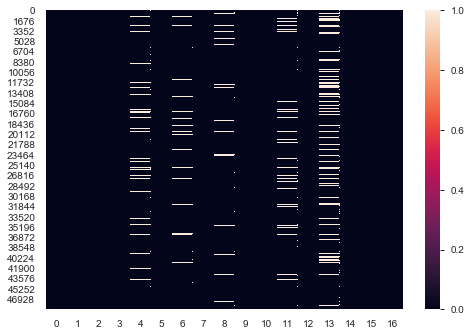

In [11]:
Dataset_inspection(autos).missing_data_analysis()

### Date columns

There are a number of columns with date information:

- __crawled_date__
- __registration_month__
- __registration_year__
- __ad_created__
- __last_online__

These are dates stored as strings, so lets explore each of these columns.

In [9]:
autos[['crawled_date','registration_month', 'registration_year','ad_created','last_online']][0:5]

,crawled_date,registration_month,registration_year,ad_created,last_online
0,2016-03-26 17:47:46,3,2004,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,6,1997,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,7,2009,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,6,2007,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,7,2003,2016-04-01 00:00:00,2016-04-01 14:38:50


In [14]:
autos.dtypes

crawled_date          object
name                  object
price                  int32
abtest                object
vehicle_type          object
registration_year      int64
gearbox               object
power_PS               int64
model                 object
odometer_km            int32
registration_month     int64
fuel_type             object
brand                 object
unrepaired_damage     object
ad_created            object
postal_code            int64
last_online           object
dtype: object

In [22]:
data_numercal=autos.select_dtypes(['int32','int64'])
data_categorical=autos.select_dtypes(['object'])

In [17]:
### Outlier Analysis

Name of Feature : price
Skewness of Feature : 182.26858491098577


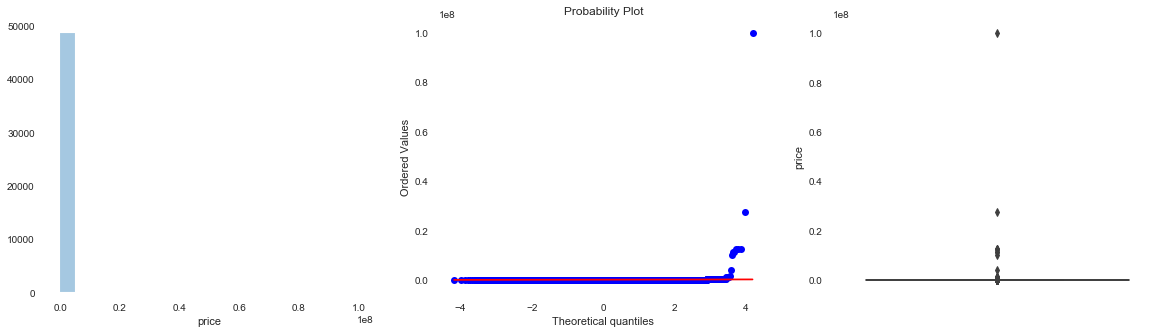

Name of Feature : registration_year
Skewness of Feature : 73.51388489627983


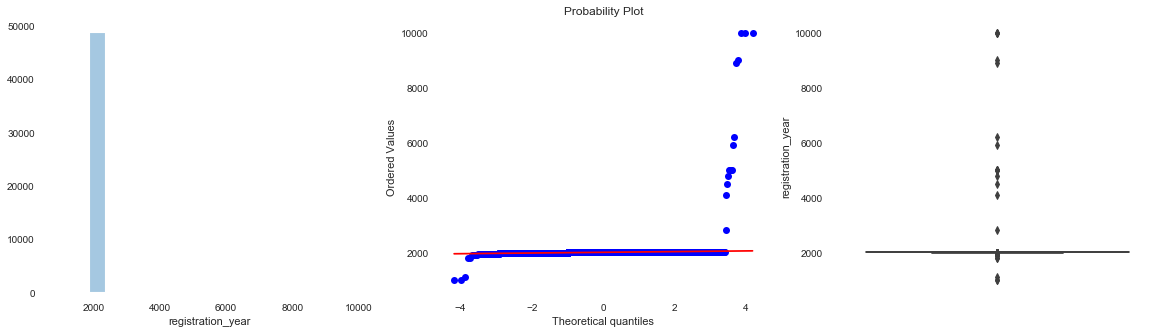

Name of Feature : power_PS
Skewness of Feature : 57.47806344972189


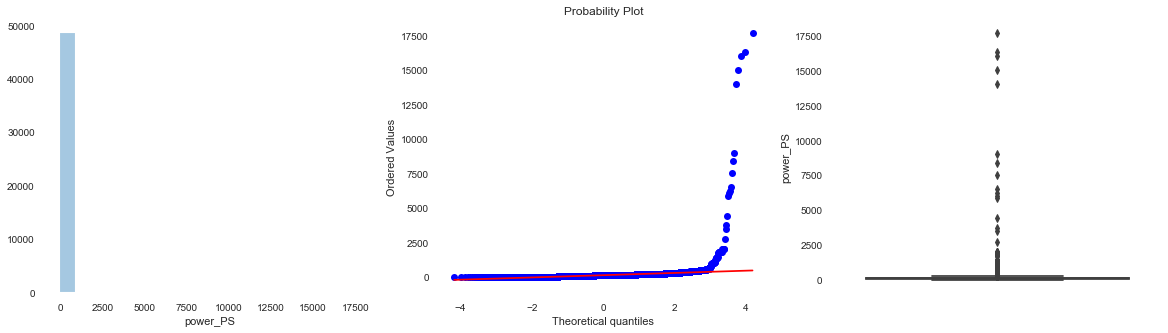

Name of Feature : odometer_km
Skewness of Feature : -1.5527691537176822


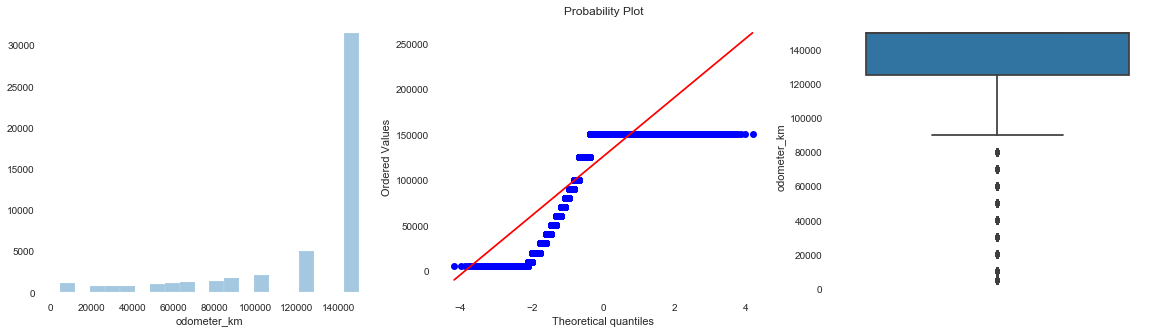

Name of Feature : registration_month
Skewness of Feature : 0.07970146555537307


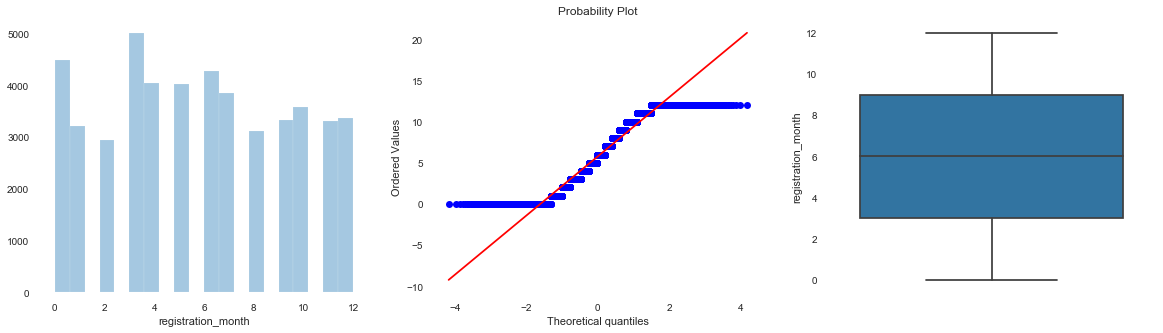

Name of Feature : postal_code
Skewness of Feature : 0.057477047479177604


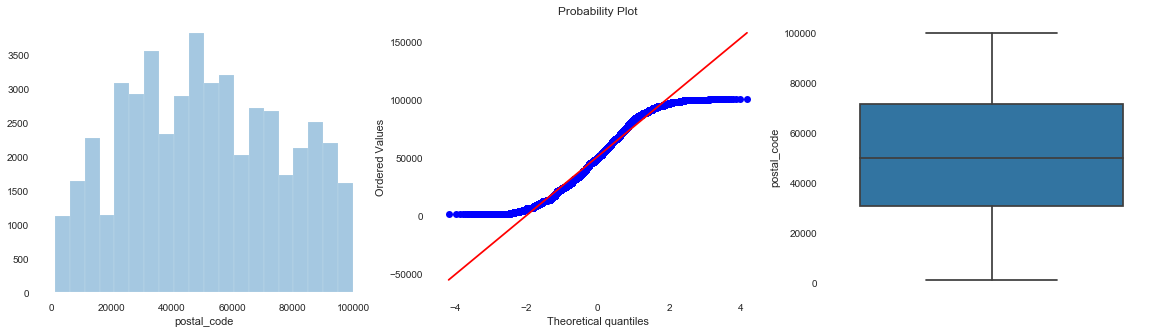


Skewness Table: 
         Feature_name  Outliers_Number  Percentage_of_Outliers    Skewness
0               price             3469                7.140946  182.268585
1   registration_year              868                1.786780   73.513885
2            power_PS             1441                2.966302   57.478063
3         odometer_km             8249               16.980588   -1.552769
4  registration_month                0                0.000000    0.079701
5         postal_code                0                0.000000    0.057477 





In [16]:
Outlier_analysis(data_numercal).graphical_outlier_analysis()

In [18]:
from plots import Graphical_analysis

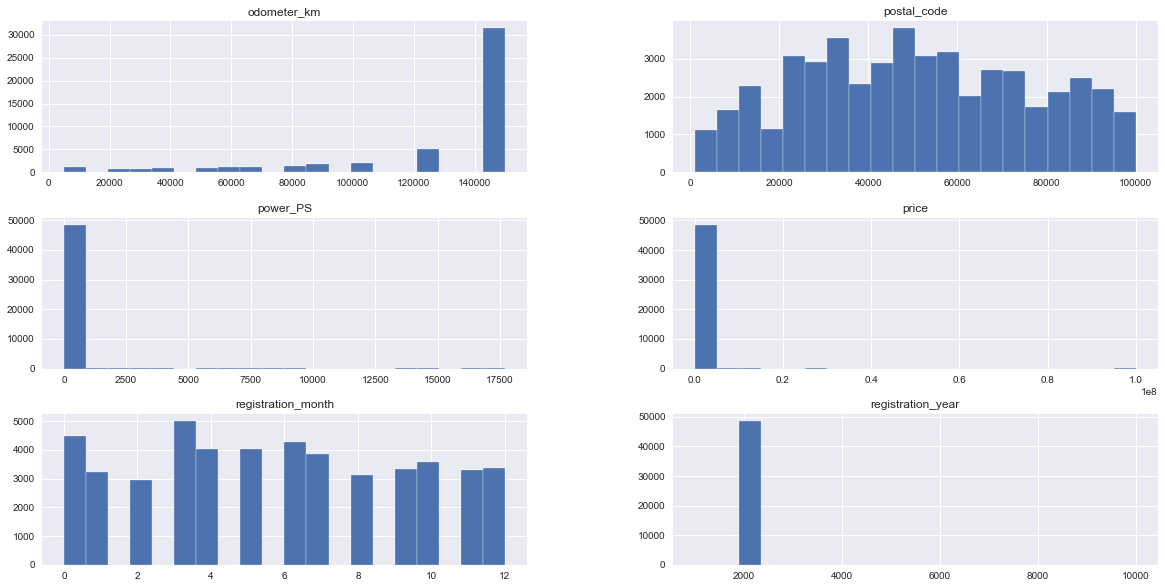

In [19]:

#Histogram for checking the Distribution
Graphical_analysis.Numerical_data_analysis(data_numercal).univariate_analysis_histogram()

C:\Users\PKK\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1676: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))


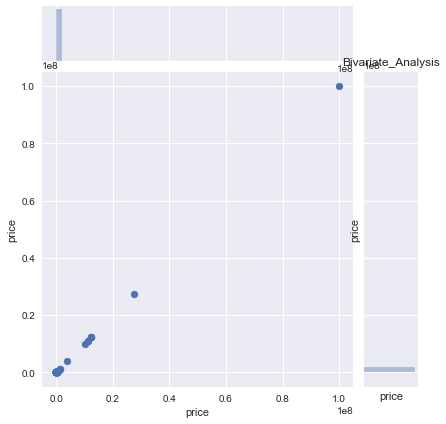

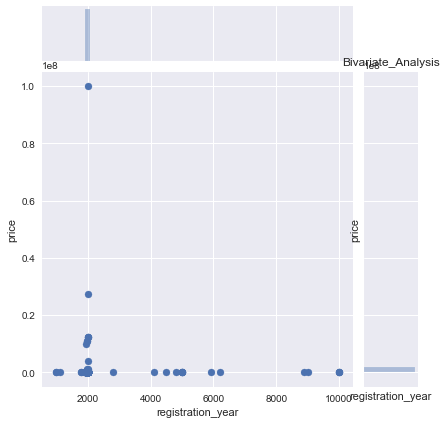

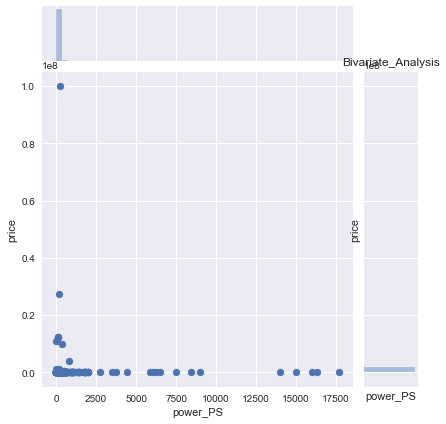

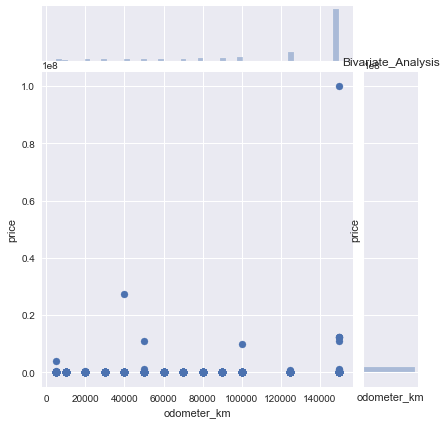

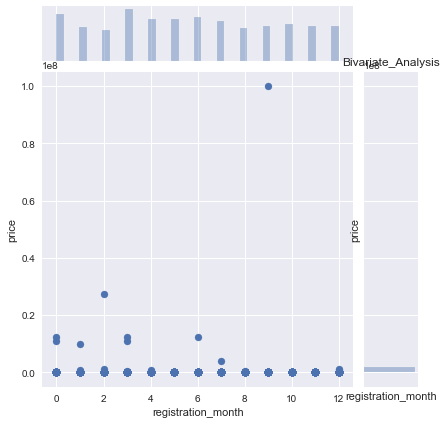

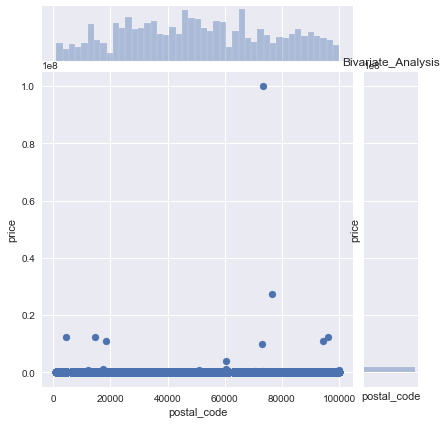

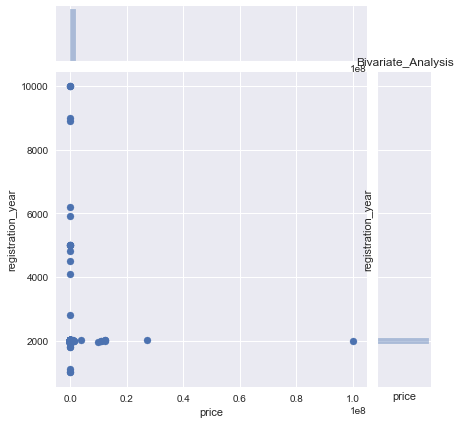

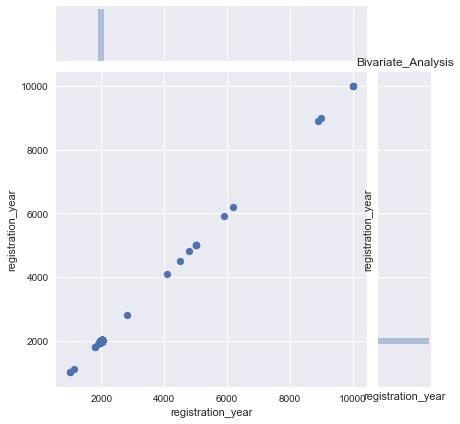

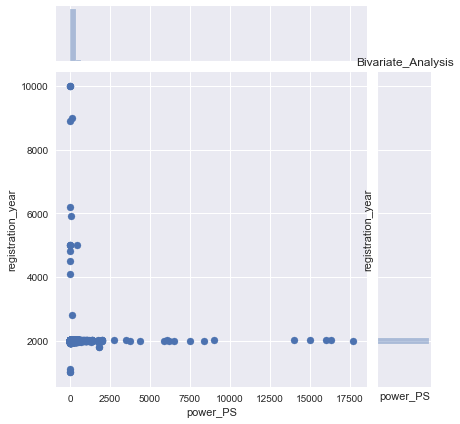

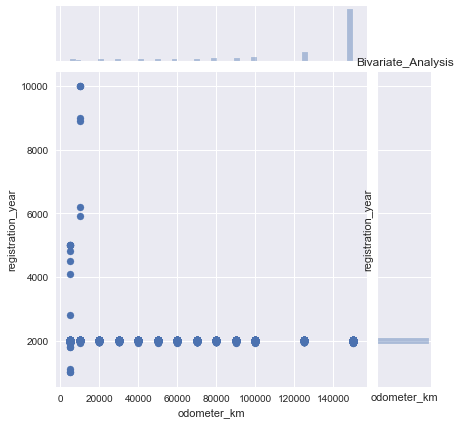

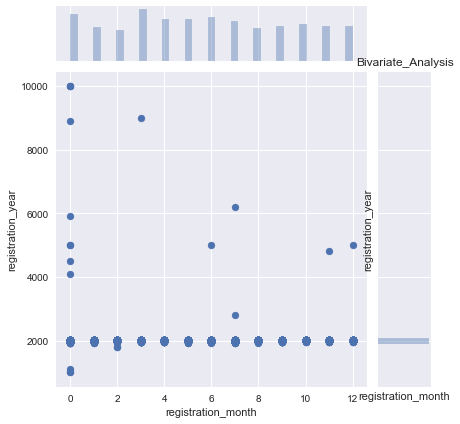

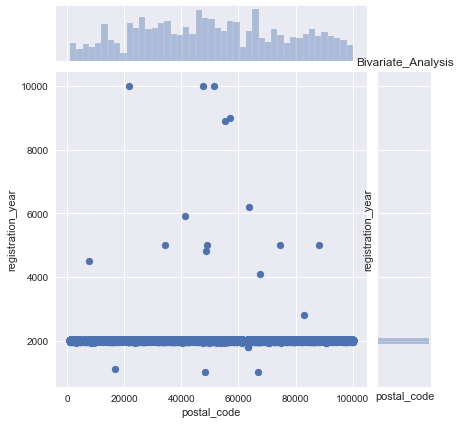

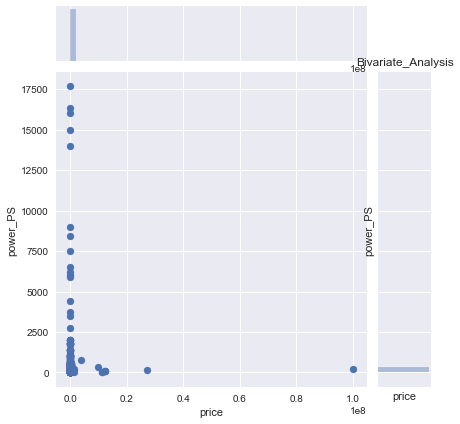

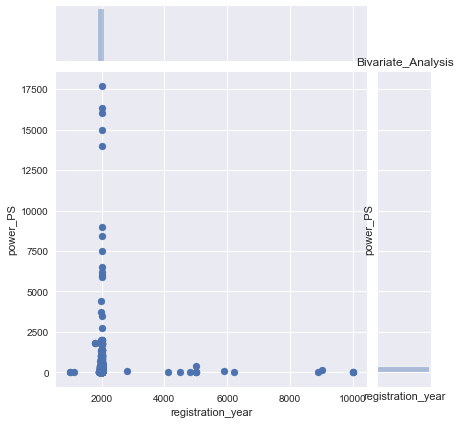

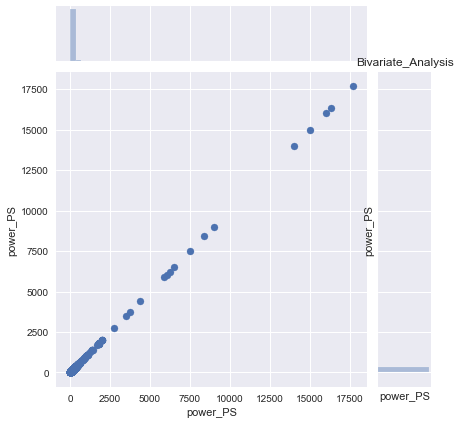

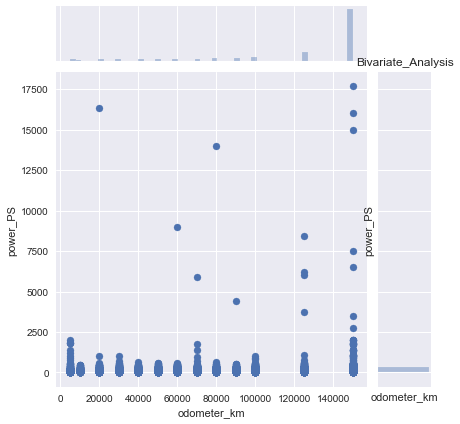

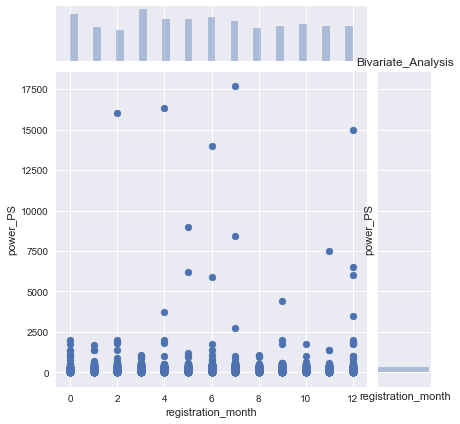

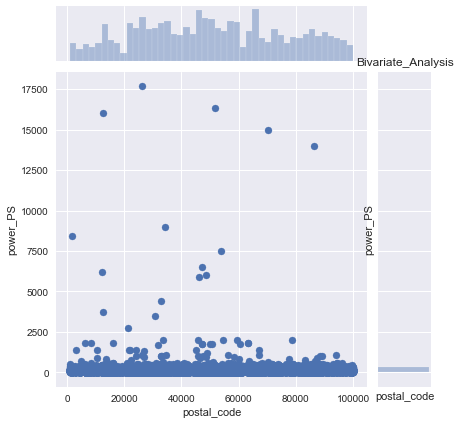

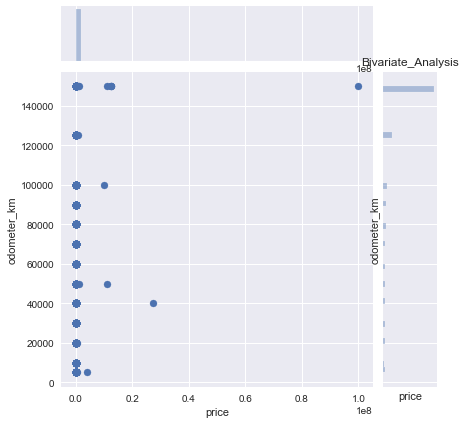

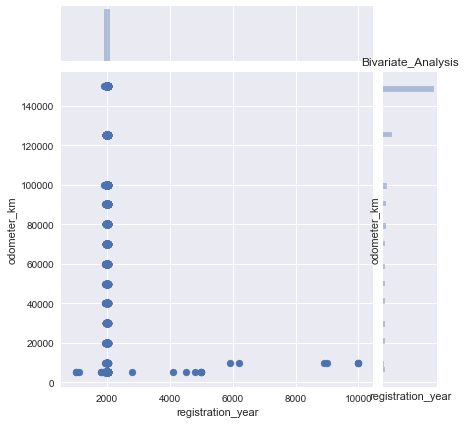

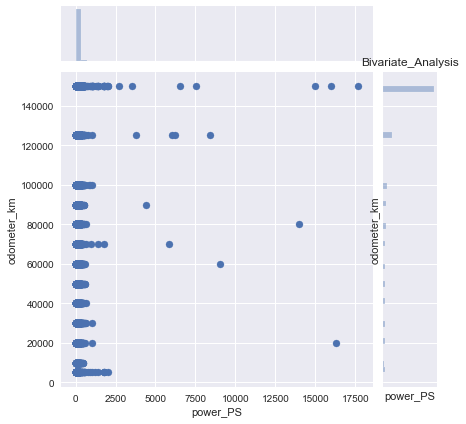

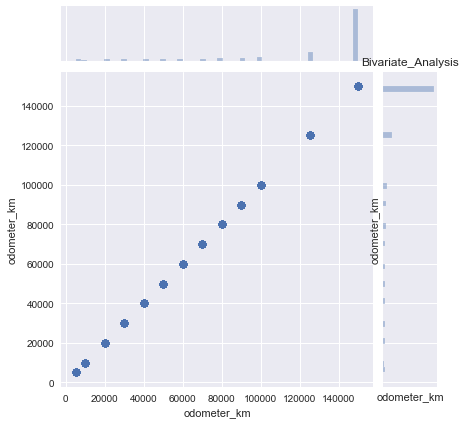

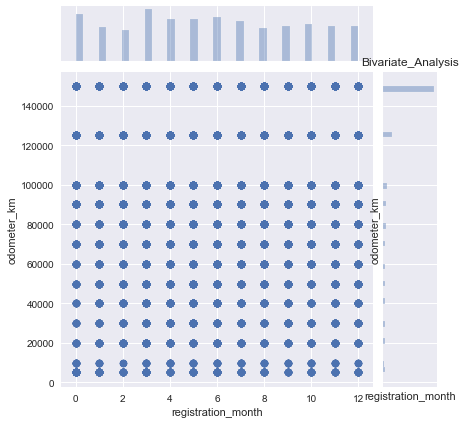

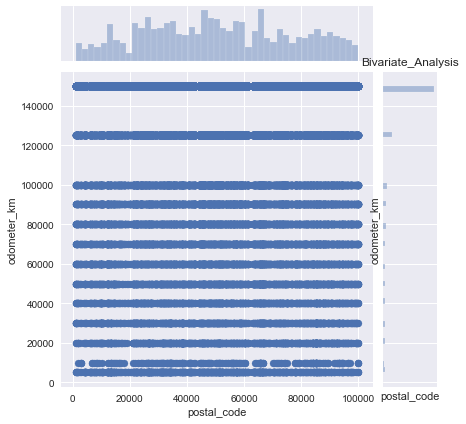

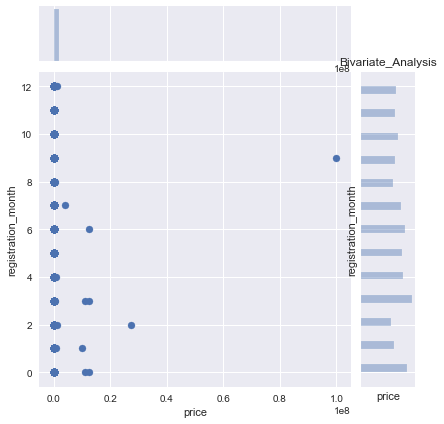

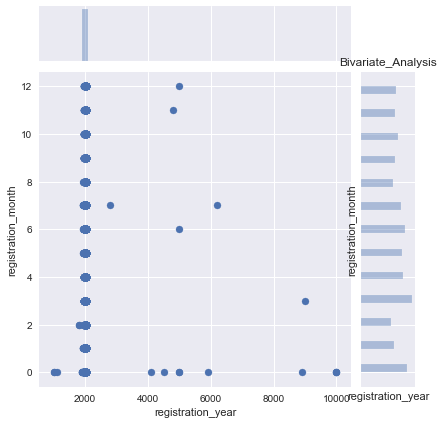

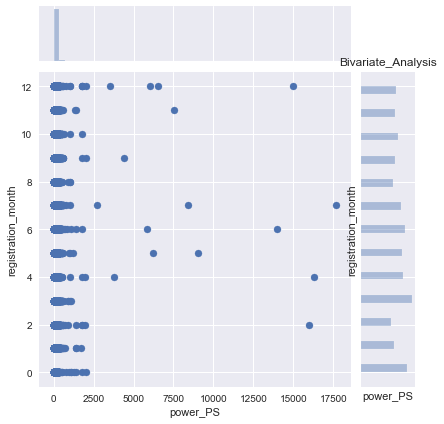

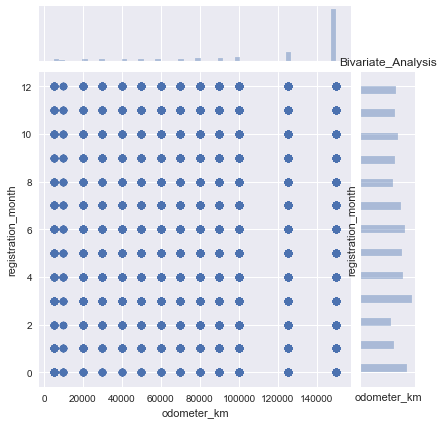

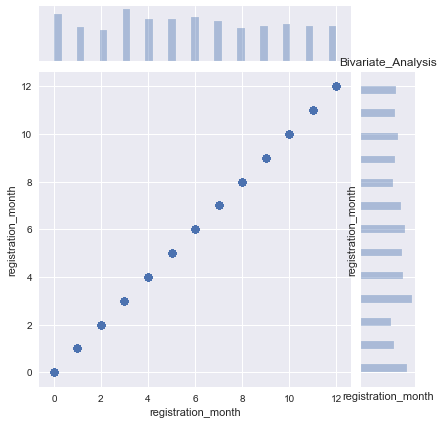

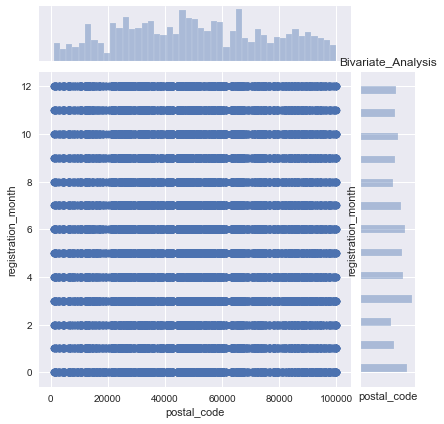

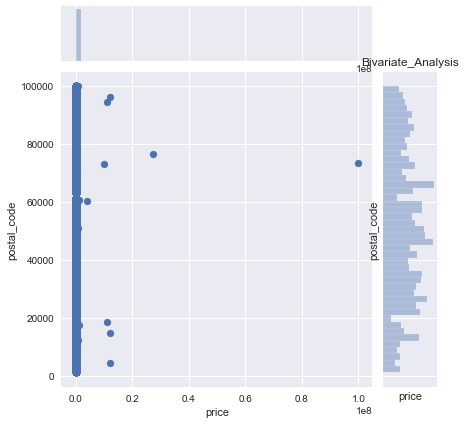

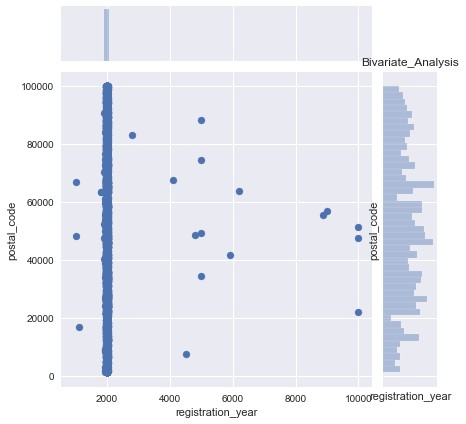

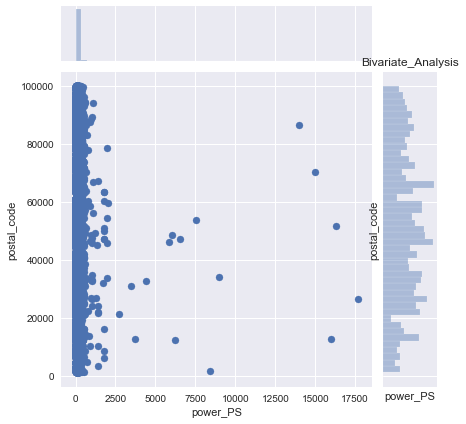

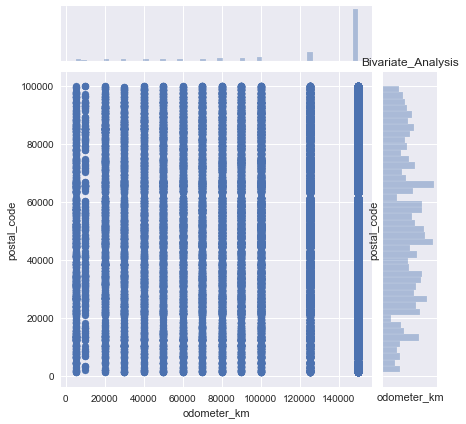

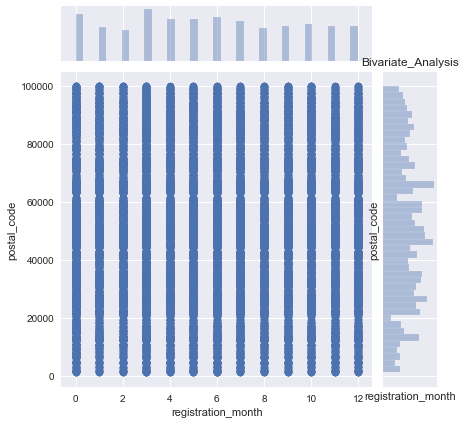

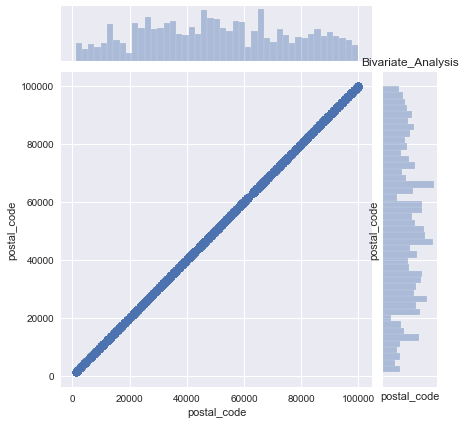

In [20]:
#Scatter Plots
for col in data_numercal:
    Graphical_analysis.Numerical_data_analysis(data_numercal).bivariate_analysis_scatterplot(col)

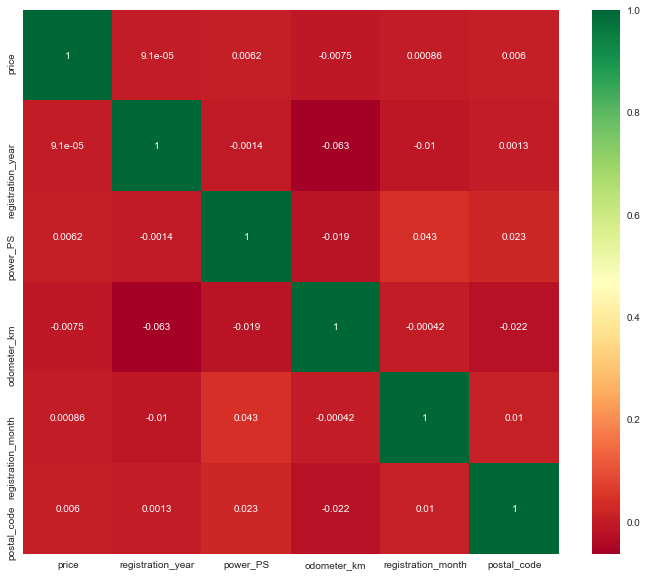

In [21]:
### Correlation Analysis
Graphical_analysis.Numerical_data_analysis(data_numercal).correlation_plot()

In [23]:
for col in data_categorical:
    Graphical_analysis.Categorical_data_analysis(data_categorical).univariate_analysis_categorical_countplot(col)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000000F2EFCBE8C8> (for post_execute):


KeyboardInterrupt: 

In [13]:
print(autos["crawled_date"]
        .str[:10]
        .value_counts(normalize=True, dropna=False)
        .sort_values()
        )

2016-04-07    0.001400
2016-04-06    0.003171
2016-03-18    0.012911
2016-04-05    0.013096
2016-03-06    0.014043
2016-03-13    0.015670
2016-03-05    0.025327
2016-03-24    0.029342
2016-03-16    0.029610
2016-03-27    0.031092
2016-03-25    0.031607
2016-03-17    0.031628
2016-03-31    0.031834
2016-03-10    0.032184
2016-03-26    0.032204
2016-03-23    0.032225
2016-03-11    0.032575
2016-03-22    0.032987
2016-03-09    0.033090
2016-03-08    0.033296
2016-04-01    0.033687
2016-03-30    0.033687
2016-03-29    0.034099
2016-03-15    0.034284
2016-03-19    0.034778
2016-03-28    0.034860
2016-04-02    0.035478
2016-03-07    0.036014
2016-04-04    0.036487
2016-03-14    0.036549
2016-03-12    0.036920
2016-03-21    0.037373
2016-03-20    0.037887
2016-04-03    0.038608
Name: crawled_date, dtype: float64


Looks like the site was crawled daily over a month period between March and April 2016. The distribution of listings crawled on each day seems roughly uniform.

Lets check __last_online__.

The crawler recorded the date it last saw any listing, which allows us to determine on what day a listing was removed, presumably because the car was sold.

The last three days contain a big amount of 'last seen online' values. Given that these are 6-10 times the values from the previous days, it is unlikely that there was a massive spike in sales, and more likely that these values are to do with the crawling period ending and do not indicate car sales.

Lets check the creation of the ads.

In [15]:
print(autos["ad_created"].str[:10].unique().shape)
(autos["ad_created"]
        .str[:10]
        .value_counts(normalize=True, dropna=False)
        .sort_index()
        )

(76,)


2015-06-11    0.000021
2015-08-10    0.000021
2015-09-09    0.000021
2015-11-10    0.000021
2015-12-05    0.000021
2015-12-30    0.000021
2016-01-03    0.000021
2016-01-07    0.000021
2016-01-10    0.000041
2016-01-13    0.000021
2016-01-14    0.000021
2016-01-16    0.000021
2016-01-22    0.000021
2016-01-27    0.000062
2016-01-29    0.000021
2016-02-01    0.000021
2016-02-02    0.000041
2016-02-05    0.000041
2016-02-07    0.000021
2016-02-08    0.000021
2016-02-09    0.000021
2016-02-11    0.000021
2016-02-12    0.000041
2016-02-14    0.000041
2016-02-16    0.000021
2016-02-17    0.000021
2016-02-18    0.000041
2016-02-19    0.000062
2016-02-20    0.000041
2016-02-21    0.000062
                ...   
2016-03-09    0.033151
2016-03-10    0.031895
2016-03-11    0.032904
2016-03-12    0.036755
2016-03-13    0.017008
2016-03-14    0.035190
2016-03-15    0.034016
2016-03-16    0.030125
2016-03-17    0.031278
2016-03-18    0.013590
2016-03-19    0.033687
2016-03-20    0.037949
2016-03-21 

There is a large variety of ad created dates. Most within 1-2 months of the listing date, but a few are quite old, with the oldest at around 9 months.

In [16]:
autos["registration_year"].describe()

count    48565.000000
mean      2004.755421
std         88.643887
min       1000.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

As mentioned before, the min and max values seem to have some issues; there is unlikely to have cars from year 1000 as from 9999.
Because a car can't be first registered before the listing was seen, any vehicle with a registration year above 2016 is definitely inaccurate. Determining the earliest valid year is more difficult. It should be after 1920s.

In [17]:
autos = autos[autos["registration_year"].between(1920,2016)]
autos["registration_year"].value_counts(normalize=True).head(10)

2000    0.067615
2005    0.062902
1999    0.062066
2004    0.057910
2003    0.057824
2006    0.057203
2001    0.056474
2002    0.053261
1998    0.050626
2007    0.048783
Name: registration_year, dtype: float64

It seems that 1920 was a very conservative date, given the idea that the oldest cars are from 1998, almost 20 years ago.

### Price by brand

In [18]:
autos["brand"].value_counts(normalize=True)

volkswagen        0.211286
bmw               0.110057
opel              0.107550
mercedes_benz     0.096474
audi              0.086576
ford              0.069907
renault           0.047133
peugeot           0.029844
fiat              0.025645
seat              0.018275
skoda             0.016411
nissan            0.015276
mazda             0.015190
smart             0.014161
citroen           0.014011
toyota            0.012705
hyundai           0.010027
sonstige_autos    0.009791
volvo             0.009148
mini              0.008763
mitsubishi        0.008227
honda             0.007841
kia               0.007070
alfa_romeo        0.006642
porsche           0.006127
suzuki            0.005935
chevrolet         0.005699
chrysler          0.003514
dacia             0.002635
daihatsu          0.002507
jeep              0.002271
subaru            0.002142
land_rover        0.002100
saab              0.001650
jaguar            0.001564
daewoo            0.001500
trabant           0.001371
r

It seems that Volkswagen is by far the most popular brand, as expected in Germany, its homeland. There are lots of brands that don't have a significant percentage of listings, so we will limit our analysis to brands representing more than 5% of total listings.

In [19]:
brand_counts = autos["brand"].value_counts(normalize=True)
common_brands = brand_counts[brand_counts > .05].index
print(common_brands)

Index(['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford'], dtype='object')


In [20]:
brand_mean_prices = {}

for brand in common_brands:
    brand_only = autos[autos["brand"] == brand]
    mean_price = brand_only["price"].mean()
    brand_mean_prices[brand] = int(mean_price)

print(brand_mean_prices)

{'opel': 2976, 'mercedes_benz': 8628, 'volkswagen': 5402, 'audi': 9336, 'ford': 3749, 'bmw': 8332}


The data can be sorted in 3 groups:
- Ford and Opel as _the cheapest_.
- Volkswagen as _the regular price_.
- Mercedes Benz, BMW and Audi as _the VIP cars_.

Notice that this is based on __average__ price, so this value can be influenced by some extreme values.

Lets explore the milage of the cars and check if it shows any relation betweeen those two.

In [21]:
bmp_series = pd.Series(brand_mean_prices)
pd.DataFrame(bmp_series, columns=["mean_price"])

brand_mean_mileage = {}

for brand in common_brands:
    brand_only = autos[autos["brand"] == brand]
    mean_mileage = brand_only["odometer_km"].mean()
    brand_mean_mileage[brand] = int(mean_mileage)

mean_mileage = pd.Series(brand_mean_mileage).sort_values(ascending=False)
mean_prices = pd.Series(brand_mean_prices).sort_values(ascending=False)

brand_info = pd.DataFrame(mean_mileage,columns=['mean_mileage'])
brand_info["mean_price"] = mean_prices
brand_info

,mean_mileage,mean_price
bmw,132572,8332
mercedes_benz,130788,8628
opel,129311,2976
audi,129157,9336
volkswagen,128707,5402
ford,124266,3749


The range of car mileages does not vary as much as the prices do by brand, instead all falling within 10% for the top brands. There is a slight trend to the more expensive vehicles having higher mileage, with the less expensive vehicles having lower mileage. So it would be wrong to think that the price is only determined by car's use.